d:\hands_on_machine_learning\C7 - Ensemble Learning and Random Forests\env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


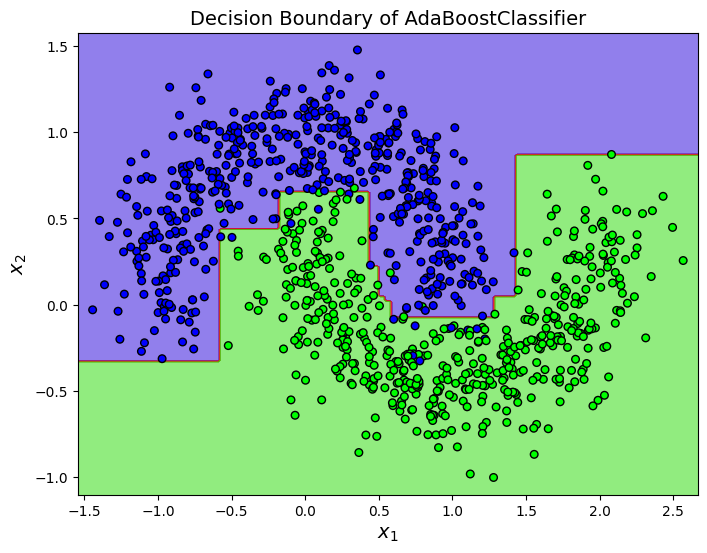

In [1]:
# We are going to use an AdaBoostClassifier, which is an ensemble classifier
# using the SAMME algorithm (Stagewise Additive Modeling using a Multiclass Exponential loss function)
# The base estimator is a Decision Stump, i.e., a Decision Tree with max_depth=1
# In other words, each weak learner is a tree with a single split (one decision node and two leaf nodes)

from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Create a synthetic 2D binary classification dataset using make_moons
X, y = make_moons(n_samples=1000, noise=0.20, random_state=42)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Create the AdaBoost classifier using 200 weak learners (decision stumps)
# algorithm='SAMME' is used for discrete AdaBoost (supports multiclass)
# learning_rate controls the contribution of each classifier
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), 
    n_estimators=200, 
    algorithm='SAMME', 
    learning_rate=0.5
)

# Train the AdaBoost classifier on the training data
ada_clf.fit(X_train, y_train)

# Function to plot the decision boundary of a classifier
def plot_decision_boundary(clf, X, y, alpha=0.5):
    x1s = np.linspace(X[:, 0].min() - 0.1, X[:, 0].max() + 0.1, 200)
    x2s = np.linspace(X[:, 1].min() - 0.1, X[:, 1].max() + 0.1, 200)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)

    plt.contourf(x1, x2, y_pred, alpha=alpha, cmap=plt.cm.brg)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors='k', cmap=plt.cm.brg)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14)

# Plot the decision boundary of the trained AdaBoost classifier
plt.figure(figsize=(8, 6))
plot_decision_boundary(ada_clf, X, y)
plt.title("Decision Boundary of AdaBoostClassifier", fontsize=14)
plt.show()